In [2]:
import warnings
warnings.filterwarnings('ignore')

## Переобучение и недообучение

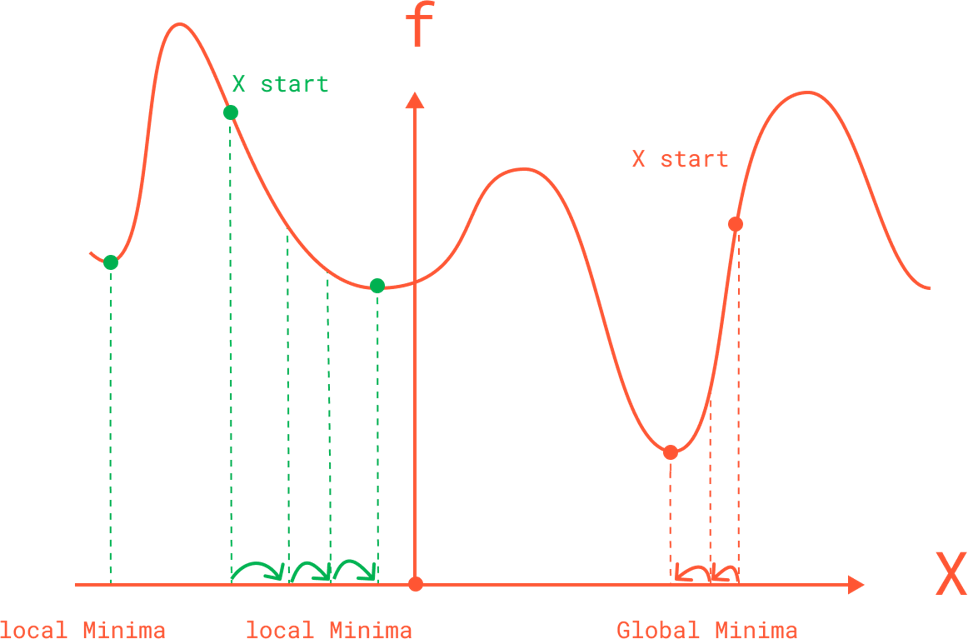


Пусть имеем 2 модели: полиномиальную и обыкновенную немодифицированную линейную без свободного коэффициента

$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$

Давайте сгенерируем выборку $(X, Y)$ следующим образом. Скажем, что **X** - какие-то случайные числа, равномерно лежащие в отрезке $[0, 20]$. Ответы (вектор таргетов $Y$) - удвоенные **X**-ы, сгенерированные с некоторым шумом, распределенным тоже равномерно на отрезке $[-6, 6]$. 

Разделим выборку на тренировочную и тестовую (например, в пропорциях 4:1) и проверим, в каком случае модель ошибается сильнее: при сложном моделировании или простом?

In [3]:
import numpy as np 

X = np.array(sorted([20*x for x in np.random.rand(120,1)]))

Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [4]:
X[-10:]

array([[18.19091965],
       [18.21829686],
       [18.39685764],
       [18.45489755],
       [18.46658965],
       [18.86873306],
       [19.02209757],
       [19.28501054],
       [19.35038222],
       [19.58158675]])

In [5]:
Y[-10:]

array([[36.4243346 ],
       [33.81652602],
       [33.42066209],
       [33.27803088],
       [38.70150097],
       [39.44893773],
       [40.10117607],
       [34.32041326],
       [39.65047621],
       [33.2836924 ]])

In [6]:
### Разобьем нашу выборку на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 1), (48, 1), (72, 1), (48, 1))

In [8]:
### Сохраним упорядоченные индексы наших элементов
### Это понадобится для визуализации!
index_argsort = np.argsort(X_train.reshape(72,))

In [9]:
index_argsort

array([57, 25, 33, 48, 42, 28, 41, 15, 32, 66, 51, 16, 27, 64, 23, 19, 54,
       71, 52, 59,  9,  3, 20, 35,  6, 53, 44, 40, 49, 46, 13, 63, 62, 26,
       65, 29, 10,  5, 69, 18, 67, 31,  4, 22, 14, 68, 45, 55, 30, 21, 50,
        8, 11,  0, 58, 24, 56, 38, 47,  7, 12, 34,  1, 60, 36, 61, 70,  2,
       37, 17, 43, 39], dtype=int64)

In [10]:
### Построим простую линейную модель
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [11]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


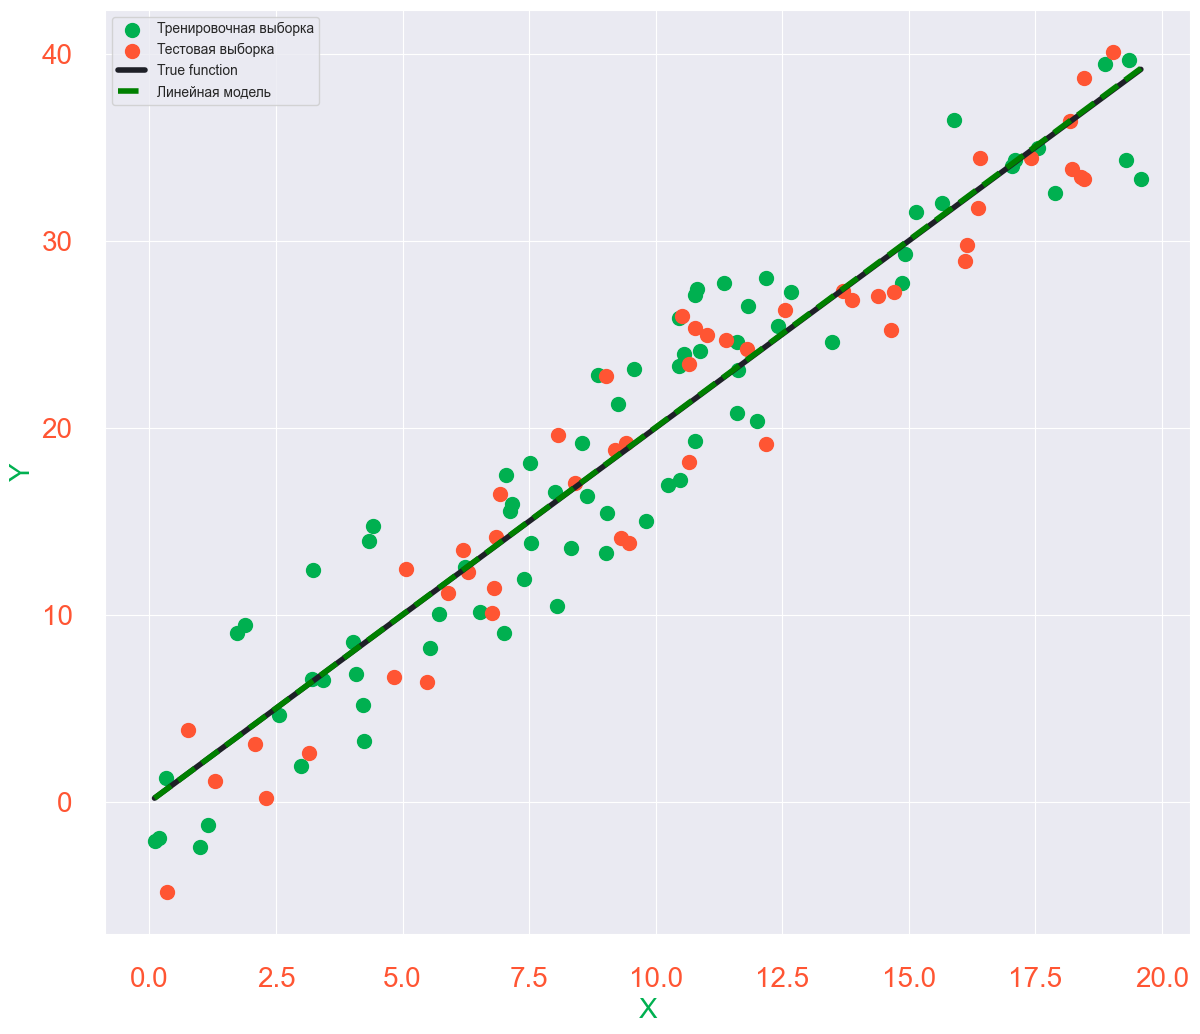

In [12]:
### Изобразим!
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [13]:
model.coef_

array([[2.00266562]])

In [14]:
### Теперь построим полиномиальную модель

X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol, 
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)

In [15]:
X_pol[0]

array([1.18209461e+01, 1.39734767e+02, 1.65179715e+03, 1.95258051e+04,
       2.30813490e+05, 2.72843383e+06, 3.22526693e+07, 3.81257066e+08,
       4.50681924e+09, 5.32748674e+10, 6.29759336e+11, 7.44435118e+12,
       8.79992742e+13, 1.04023468e+15, 1.22965581e+16, 1.45356951e+17,
       1.71825668e+18, 2.03114196e+19, 2.40100197e+20, 2.83821149e+21,
       3.35503451e+22, 3.96596822e+23, 4.68814966e+24, 5.54183645e+25,
       6.55097501e+26])

In [16]:
### Создадим новую модель model_pol

model_pol = LinearRegression()
model_pol.fit(X_pol, Y_train)

LinearRegression()

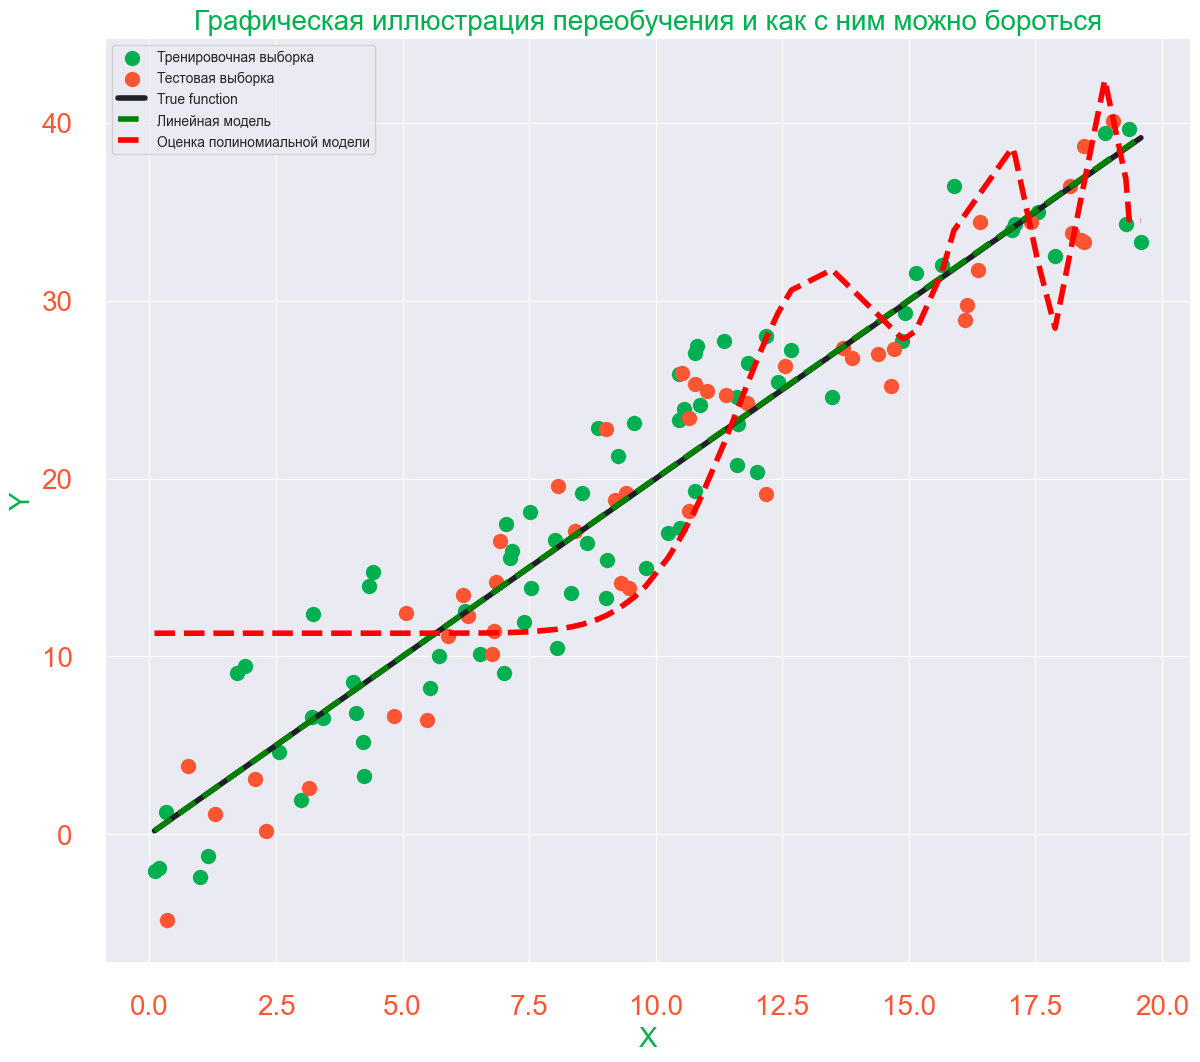

In [17]:
### Изобразим!
import matplotlib.pyplot as plt


fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)
plt.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()

In [18]:
np.mean((model.predict(X_train)-Y_train)**2)

11.090851404288436

In [19]:
np.mean((model_pol.predict(X_pol)-Y_train)**2)

32.494715966395546

In [20]:
X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, 
                           np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1),
                           axis=1)

In [21]:
np.mean((model_pol.predict(X_pol_test)-Y_test)**2)

34.752219817614105

## Вернемся к реальному практическому примеру

In [22]:
from IPython.display import Image
import pandas as pd
import numpy as np

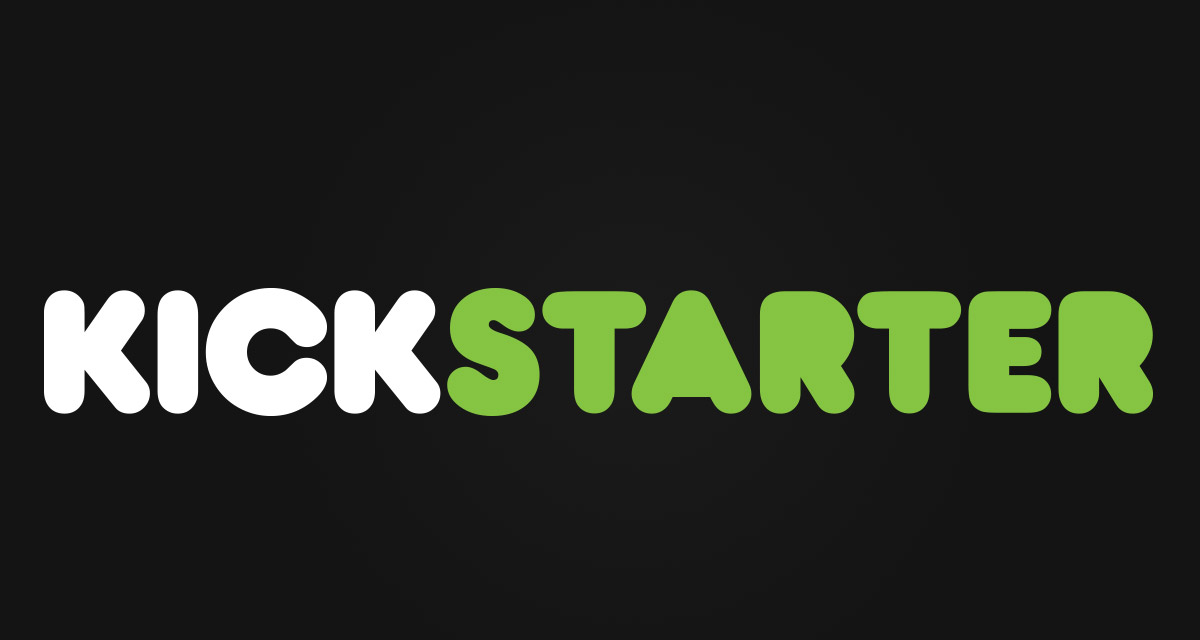

In [23]:
data = pd.read_csv('Data/ks.csv')
data = data[data['Состояние'].isin(['failed', 'successful'])]
x = pd.read_csv('Data/x.csv')
y = pd.read_csv('Data/y.csv')

In [24]:
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,successful,86,US,10030.88,10000.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,failed,0,US,0.00,10000.0


In [25]:
x.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.0,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.0,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.0,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.0,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.0,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
y.head()

,таргет2
0,625.0
1,22.0
2,35.0
3,145.0
4,387.0


In [27]:
### Сейчас будет магия!
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print('MSE равен: ', int(np.mean((y-model.predict(x))**2)))
print('RMSE равен: ', int(np.mean((y-model.predict(x))**2)**(1/2)))

MSE равен:  9350073813
RMSE равен:  96695


## Замерим качество на Кросс-Валидации!

In [28]:
x

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.00,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.00,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.00,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.00,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.00,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,7635.064778,35.98,2,2017,34.41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
331671,38415.722876,271.03,4,2017,34.41,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331672,6098.303122,200.00,3,2017,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331673,38415.722876,250.00,1,2017,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_2

NameError: name 'X_2' is not defined

In [ ]:
### Метод KFOLD
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=33)

In [ ]:
kf.get_n_splits()

In [ ]:
kf.split(x)

In [ ]:
x.values

In [ ]:
losses_test = []
losses_train = []

for train_index, test_index in kf.split(x):
    X_train, X_test = x.values[train_index], x.values[test_index]
    Y_train, Y_test = y.values[train_index], y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    losses_test.append(np.mean((model.predict(X_test)-Y_test)**2)**(1/2))
    losses_train.append(np.mean((model.predict(X_train)-Y_train)**2)**(1/2))

In [ ]:
losses_test

In [ ]:
losses_train

In [ ]:
np.mean(losses_test)

In [ ]:
np.mean(losses_train)

## Стоило ли нам обрабатывать категориальные признаки?

In [ ]:
data['Дедлайн'] = pd.to_datetime(data['Дедлайн'])
data['Дата публикации'] = pd.to_datetime(data['Дата публикации'])

data['Срок'] = (data['Дедлайн'] - data['Дата публикации']).dt.days

### Выделим год запуска проекта
data['Год публикации'] = data['Дата публикации'].dt.year

Macro = pd.read_excel("macrofeatures.xlsx", engine="openpyxl")

### Смерджим колонки. Оставим от макрофичей какую-нибудь одну.

Macro = Macro[['Close_brent', 'dlk_cob_date']].drop_duplicates()
Macro['dlk_cob_date'] = pd.to_datetime(Macro['dlk_cob_date'])

data['Дата публикации'] = data['Дата публикации'].astype('datetime64[ns]')

data = pd.merge(data,
         Macro,
         left_on=['Дата публикации'],
         right_on=['dlk_cob_date'],
         how='left')

data = data.sort_values('Дата публикации')

data['Close_brent'] = data['Close_brent'].fillna(34.41)

data = data.drop(['Дедлайн', 'Дата публикации', 'dlk_cob_date'], axis=1)

### Уберем колонки Дедлайн, Дата запуска, Инвесторы, Название, Страна

data = data.drop(['Название', 'Страна', 'Инвесторов'], axis=1)


In [ ]:
data.head()

In [ ]:
X_2  = data.drop(['Категория', 'Главная категория',
                  'Валюта', 'Состояние', 'Собрано в долларах'],
                 axis=1)

Y_2 = data['Собрано в долларах']

In [ ]:
X_2

In [ ]:
losses_test = []
losses_train = []

for train_index, test_index in kf.split(x):
    X_train, X_test = X_2.values[train_index], X_2.values[test_index]
    Y_train, Y_test = Y_2.values[train_index], Y_2.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    loss_test = np.mean((model.predict(X_test)-Y_test)**2)
    loss_train = np.mean((model.predict(X_train)-Y_train)**2)
    
    losses_test.append(loss_test**(1/2))
    losses_train.append(loss_train**(1/2))

In [ ]:
np.mean(losses_train), np.mean(losses_test)